## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Stima dell'integrale di f(x) = x 

In questo esercizio si utilizza il metodo Monte Carlo per stimare il valore dell'integrale definito:

$\langle x \rangle = \int_0^1 x dx = 1/2$


Si è generato un insieme di numeri casuali distribuiti uniformemente nell'intervallo [0,1), e si è calcolata la media in blocchi successivi, applicando il metodo del **data blocking** per stimare il valore atteso e la relativa incertezza statistica.

Il risultato viene confrontato con il valore teorico dell'integrale (0.5), e il grafico mostra la deviazione del valore medio cumulativo rispetto a quello atteso, con barre di errore calcolate per ciascun blocco.

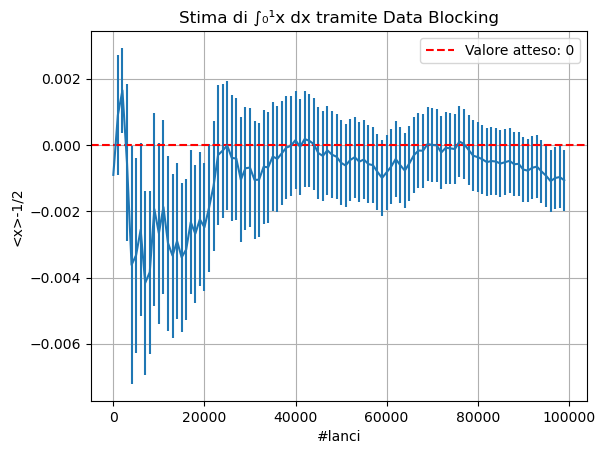

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000              # Total number of throws
N = 100                 # Number of blocks
x = np.arange(N)      # [0,1,2,...,N-1]
L = int(M/N)

# Initialize empty lists to store the two types of data
average = []
error = []

# Open the file in read mode
with open('Output_1', 'r') as file:
    for line in file:
        # Split the line into two parts based on a space (or another delimiter)
        part1, part2 = line.split()  # Assuming each line has two items separated by a space

        # Add the split data to the respective lists, and simultaneously convert strings into floating points
        average.append(float(part1))
        error.append(float(part2))

# Print the two separate lists
# print("Average:", average)
# print("Error:", error)

# Convert the lists to numpy arrays (vectors)
average = np.array(average)
error = np.array(error)

x *= L # Number of throws = block * (Number of throws in each block)
plt.title('Stima di ∫₀¹x dx tramite Data Blocking')
plt.errorbar(x, average - 0.5, yerr = error)
plt.axhline(0, color='red', linestyle='--', label='Valore atteso: 0') # Horizontal bar at 0
plt.legend()
plt.xlabel('#lanci')
plt.ylabel('<x>-1/2')
plt.grid(True)
plt.show()

### Analisi dei risultati

Il grafico mostra l'andamento della quantità ⟨x⟩ - 0.5 in funzione del numero di lanci effettuati, stimata tramite il metodo del data blocking. Il valore atteso teorico è pari a 0, come indicato dalla linea tratteggiata rossa.

Si osserva che il valore stimato converge rapidamente verso il valore atteso, con barre d'errore decrescenti all'aumentare del numero di blocchi. Tuttavia, si nota una **leggera deviazione** dal valore teorico che, pur essendo molto piccola, risulta **statisticamente significativa** a causa delle barre d'errore ridotte. Questo può essere dovuto a fluttuazioni statistiche residue.

In ogni caso, il risultato mostra un buon accordo generale e conferma la validità del metodo Monte Carlo applicato.


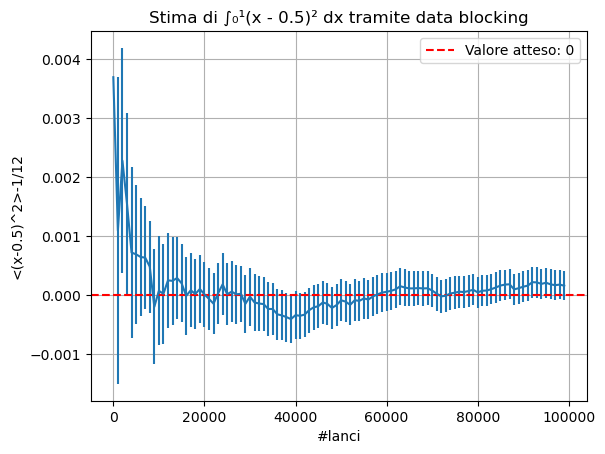

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000              # Total number of throws
N = 100                 # Number of blocks
x = np.arange(N)      # [0,1,2,...,N-1]
L = int(M/N)

# Initialize empty lists to store the two types of data
average = []
error = []

# Open the file in read mode
with open('Output_2', 'r') as file:
    for line in file:
        # Split the line into two parts based on a space (or another delimiter)
        part1, part2 = line.split()  # Assuming each line has two items separated by a space

        # Add the split data to the respective lists, and simultaneously convert strings into floating points
        average.append(float(part1))
        error.append(float(part2))

# Print the two separate lists
# print("Average:", average)
# print("Error:", error)

# Convert the lists to numpy arrays (vectors)
average = np.array(average)
error = np.array(error)

x *= L # Number of throws = block * (Number of throws in each block)
plt.title("Stima di ∫₀¹(x - 0.5)² dx tramite data blocking")
plt.errorbar(x, average - 1/12, yerr=error)
plt.axhline(0, color='red', linestyle='--', label='Valore atteso: 0') # Horizontal bar at 0
plt.legend()
plt.xlabel('#lanci')
plt.ylabel('<(x-0.5)^2>-1/12')
plt.grid(True)
plt.show()

### Analisi dei risultati

In questo caso si è stimata la varianza della distribuzione uniforme nell'intervallo \([0, 1)\), ovvero:

$\sigma^2 = \int_0^1 (x-1/2)^2 dx = 1/12$

Il grafico mostra che il valore stimato converge correttamente verso quello teorico, e risulta **statisticamente compatibile** entro le barre d'errore.

Questo conferma che il generatore di numeri casuali utilizzato è ben calibrato, e che la procedura di blocchi fornisce una buona stima sia del valore medio sia dell'incertezza associata.

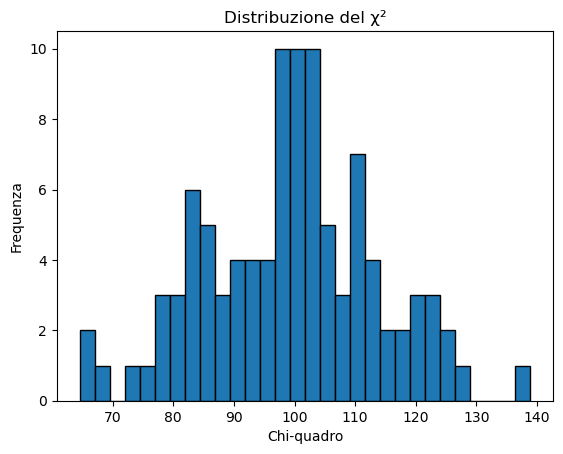

In [117]:
import matplotlib.pyplot as plt

# Empty list
chi_squared_values = []

# Open the file in read mode
with open("Output_chi", "r") as file:
    for line in file:
        chi_squared_values.append(float(line.strip()))

# Plotting the histogram
plt.hist(chi_squared_values, bins=30, edgecolor='black')
plt.title("Distribuzione del χ²")
plt.xlabel("Chi-quadro")
plt.ylabel("Frequenza")

# Show the plot
plt.show()


### Analisi dei risultati

Il grafico mostra i valori ottenuti dal test del chi-quadro applicato a 100 suddivisioni dell'intervallo [0,1), ciascuna contenente eventi contati in base alla distribuzione uniforme dei numeri casuali generati.

La distribuzione dei valori di χ² ottenuti appare **simmetrica e centrata attorno a 100**, che rappresenta il valore atteso per una distribuzione uniforme con 99 gradi di libertà.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

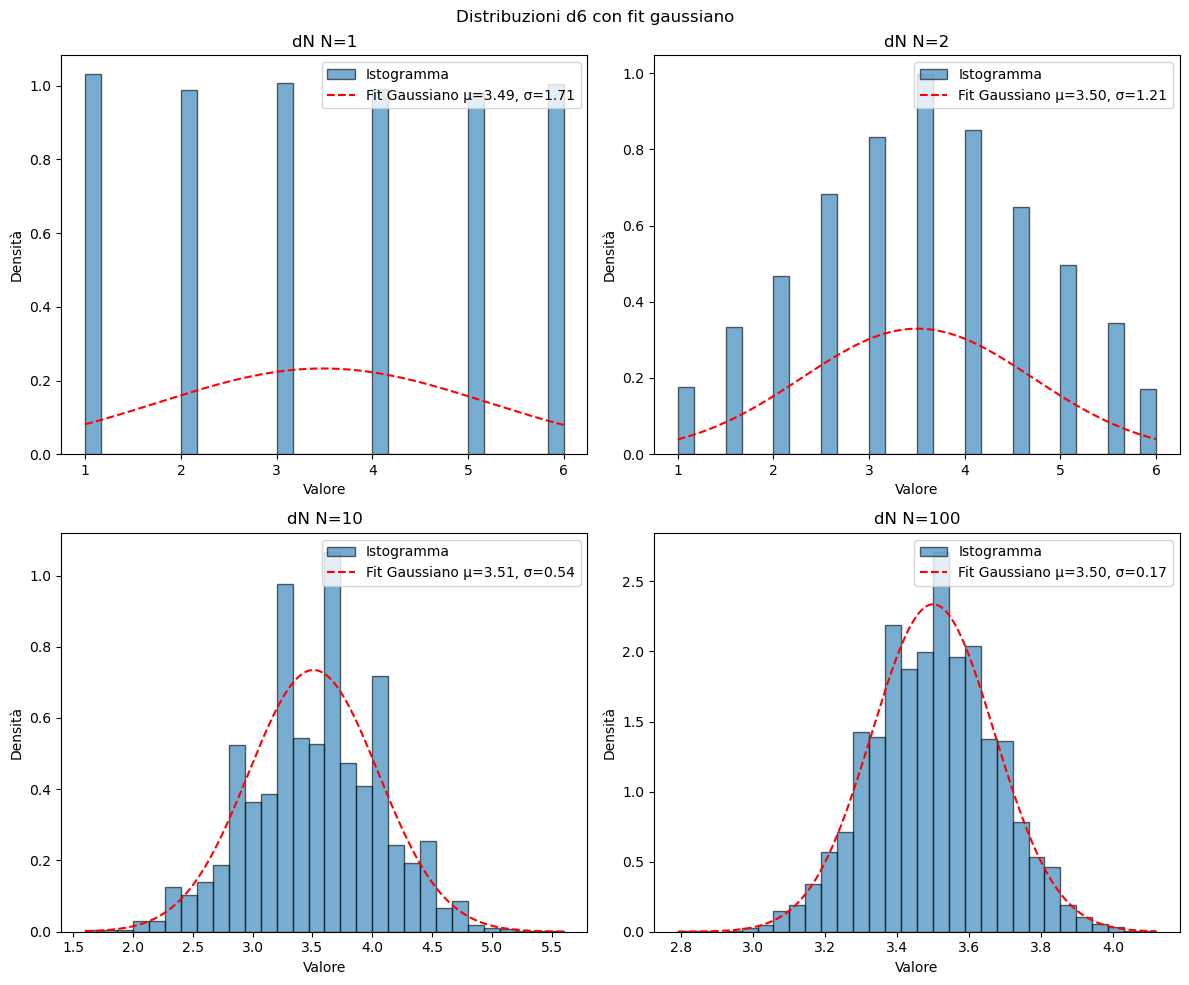

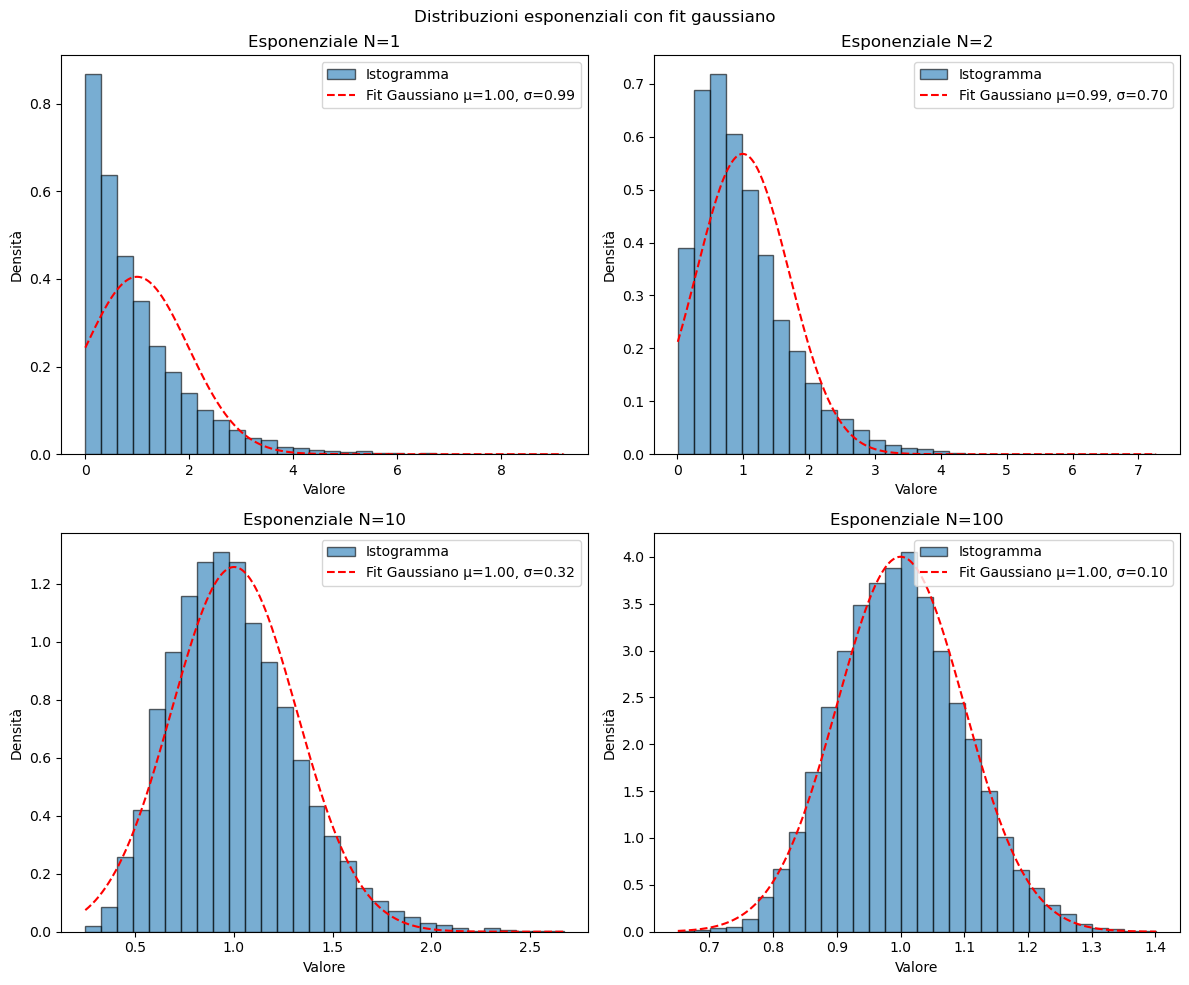

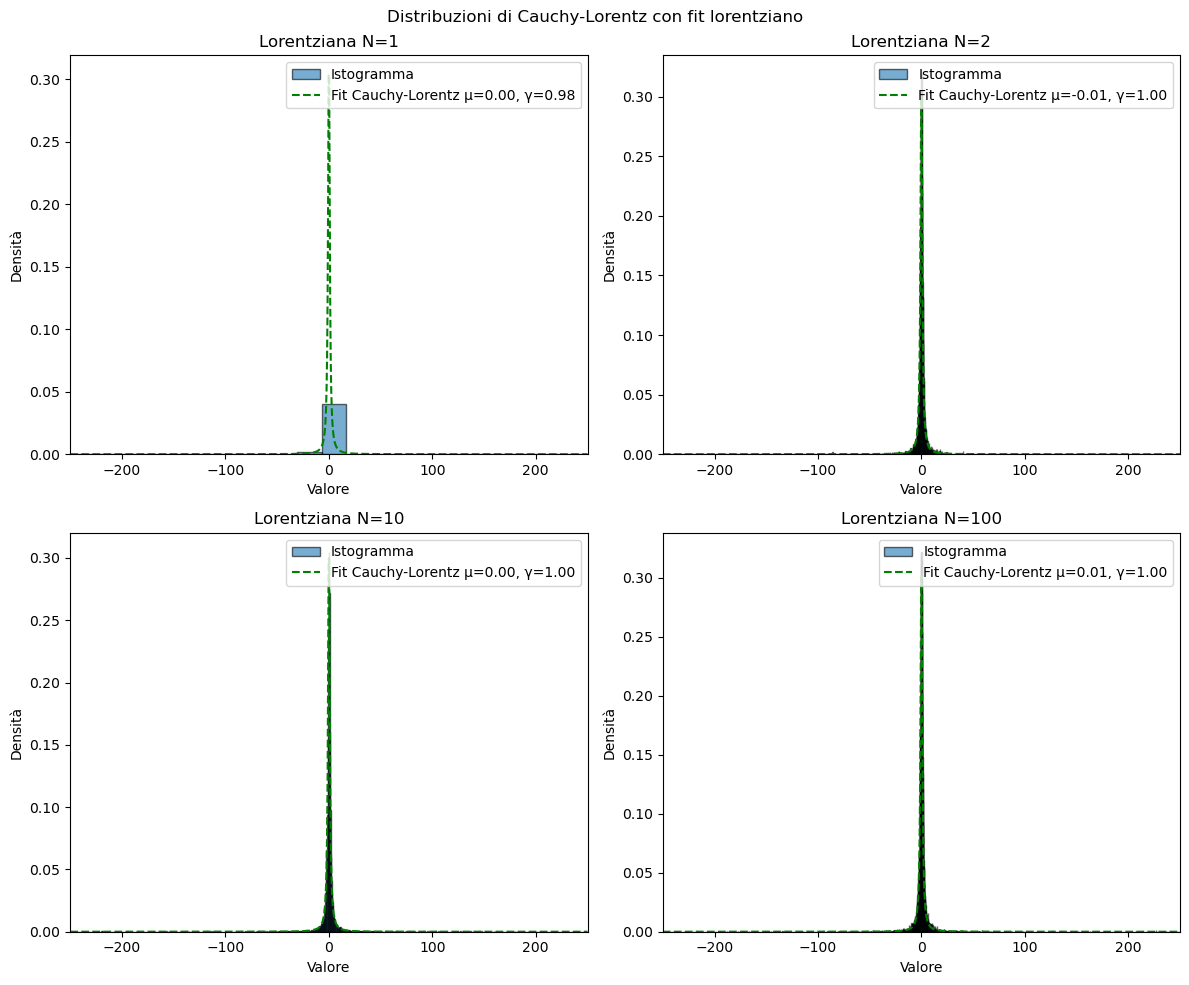

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy # Import for fit

# Load data using dictionaries (thanks to blockchain course)
data = {
    "dN":    {1: [], 2: [], 10: [], 100: []},
    "dExp": {1: [], 2: [], 10: [], 100: []},
    "dLor": {1: [], 2: [], 10: [], 100: []}
}

def load_data(dist_name, index, key):
    filename = f"Output_{dist_name}_{index}"
    with open(filename, "r") as file:
        for line in file:
            data[dist_name][key].append(float(line.strip()))

for i, n in enumerate([1, 2, 10, 100], start=1):
    load_data("dN", i, n)
    load_data("dExp", i, n)
    load_data("dLor", i, n)

# Plotting functions
def plot_hist_with_fit(ax, values, title, bins=30, xlim=None, fit_gauss=True, fit_lorentz=False):
    ax.hist(values, bins=bins, density=True, alpha=0.6, edgecolor='black', label="Istogramma")

    if fit_gauss:
        mu_gauss, sigma_gauss = norm.fit(values)
        x_gauss = np.linspace(min(values), max(values), 1000)
        y_gauss = norm.pdf(x_gauss, mu_gauss, sigma_gauss)
        ax.plot(x_gauss, y_gauss, 'r--', label=f"Fit Gaussiano μ={mu_gauss:.2f}, σ={sigma_gauss:.2f}")
        ax.legend(loc='upper right') # Specificata la posizione per evitare il warning

    if fit_lorentz:
        mu_lorentz, gamma_lorentz = cauchy.fit(values)
        x_lorentz = np.linspace(min(values) if xlim is None else xlim[0],
                                max(values) if xlim is None else xlim[1],
                                1000)

        y_lorentz = cauchy.pdf(x_lorentz, loc=mu_lorentz, scale=gamma_lorentz)
        ax.plot(x_lorentz, y_lorentz, 'g--', label=f"Fit Cauchy-Lorentz μ={mu_lorentz:.2f}, γ={gamma_lorentz:.2f}")
        ax.legend(loc='upper right') # Specificata la posizione per evitare il warning

    ax.set_title(title)
    ax.set_xlabel("Valore")
    ax.set_ylabel("Densità")

    if xlim:
        ax.set_xlim(xlim)

# Plot all d6 distributions in one figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, N in zip(axes.ravel(), [1, 2, 10, 100]):
    plot_hist_with_fit(ax, data["dN"][N], f"dN N={N}", bins=30, fit_gauss=True)
plt.suptitle("Distribuzioni d6 con fit gaussiano")
plt.tight_layout()
plt.show()

# Plot all exponential distributions in one figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, N in zip(axes.ravel(), [1, 2, 10, 100]):
    plot_hist_with_fit(ax, data["dExp"][N], f"Esponenziale N={N}", bins=30, fit_gauss=True)
plt.suptitle("Distribuzioni esponenziali con fit gaussiano")
plt.tight_layout()
plt.show()

# Plot all exponential distributions in one figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, N in zip(axes.ravel(), [1, 2, 10, 100]):
    bins = 60000
    plot_hist_with_fit(ax, data["dLor"][N], f"Lorentziana N={N}", bins=bins, xlim=(-250, 250), fit_gauss=False, fit_lorentz=True)
plt.suptitle("Distribuzioni di Cauchy-Lorentz con fit lorentziano")
plt.tight_layout()
plt.show()

## Analisi dei risultati 
### Distribuzione di d6 (somma di N lanci di un dado a 6 facce)

Questi istogrammi mostrano la distribuzione della media di N lanci di un dado a 6 facce (d6). Come previsto dal **teorema del limite centrale**, all'aumentare di N la distribuzione tende a una **Gaussiana**.

- **Valore medio atteso**:  
  Ogni lancio ha media 3.5, quindi la media di N lanci ha ancora media 3.5.  
- **Deviazione standard attesa**:  
  Per una variabile discreta con valori da 1 a 6:
  
  $\sigma = \sqrt{\frac{35}{12N}} \approx \frac{1.71}{\sqrt{N}}$
  
  Per N=100, questo dà circa **σ ≈ 0.17**, in **ottimo accordo con i risultati numerici**.

Il fit gaussiano sovrapposto conferma la convergenza alla distribuzione normale.


### Distribuzione della media di variabili esponenziali

Le distribuzioni mostrate sono le medie di N variabili casuali esponenziali con parametro λ = 1.

- **Valore medio teorico**:
  $$
  \mu = \frac{1}{\lambda} = 1
  $$
- **Deviazione standard teorica della media**:
  $$
  \sigma = \frac{1}{\sqrt{N}} \quad \text{(poiché varianza di singola exp = 1)}
  $$

Nel caso N = 100, il fit gaussiano produce **μ ≈ 1** e **σ ≈ 0.1**, **in perfetto accordo con la teoria**. Anche qui il teorema del limite centrale è chiaramente visibile: la distribuzione si avvicina sempre più a una Gaussiana all’aumentare di N.


### Distribuzione della media di variabili Cauchy-Lorentz

Le figure mostrano la media di N variabili Cauchy-Lorentz generate con il metodo:

$$
x = \gamma \tan\left[\pi (r - 0.5)\right] + \mu, \quad \text{con } \gamma = 1, \, \mu = 0
$$

Nel codice C++ usato per la generazione dei dati, questi parametri sono fissi, quindi la **densità teorica** attesa è:

$$
f(x) = \frac{1}{\pi \gamma \left[1 + \left( \frac{x - \mu}{\gamma} \right)^2 \right]} = \frac{1}{\pi (1 + x^2)}
$$

- La **media teorica** della Cauchy-Lorentz **non esiste** (diverge).
- Tuttavia, **la mediana coincide con μ**, e la **larghezza a metà altezza** è γ.

Il **fit con la funzione teorica** restituisce:
- μ ≈ 0.01
- γ ≈ 1

Questi valori sono **coerenti con i parametri di generazione** usati nel codice, confermando che la simulazione produce correttamente la distribuzione Cauchy-Lorentz.

A differenza delle distribuzioni precedenti, qui **non c’è convergenza a una Gaussiana**, nemmeno per N=100: ciò è previsto dalla teoria, poiché la Cauchy-Lorentz **non è una distribuzione a varianza finita** e quindi **non è soggetta al teorema del limite centrale**.


### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

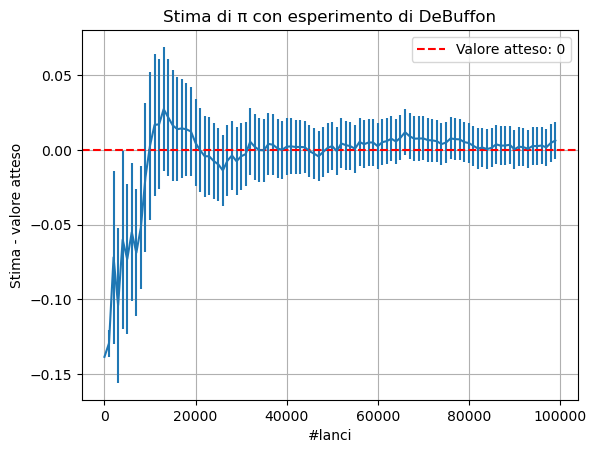

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000              # Total number of throws
N = 100                 # Number of blocks
x = np.arange(N)      # [0,1,2,...,N-1]
L = int(M/N)

# Initialize empty lists to store the two types of data
average = []
error = []

# Open the file in read mode
with open('Output_DeBuffon', 'r') as file:
    for line in file:
        # Split the line into two parts based on a space (or another delimiter)
        part1, part2 = line.split()  # Assuming each line has two items separated by a space

        # Add the split data to the respective lists, and simultaneously convert strings into floating points
        average.append(float(part1))
        error.append(float(part2))

# Print the two separate lists
# print("Average:", average)
# print("Error:", error)

# Convert the lists to numpy arrays (vectors)
average = np.array(average)
error = np.array(error)

x *= L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x, average - math.pi, yerr = error)
plt.title("Stima di π con esperimento di DeBuffon")
plt.axhline(0, color='red', linestyle='--', label='Valore atteso: 0') # Horizontal bar at 0
plt.legend()
plt.xlabel('#lanci')
plt.ylabel('Stima - valore atteso')
plt.grid(True)
plt.show()

### Analisi dei risultati

Nel grafico è riportato il valore medio progressivo della stima di π ottenuta tramite l'esperimento dell’ago di Buffon, con suddivisione in 100 blocchi da 1.000 lanci ciascuno. La banda d’errore rappresenta l’incertezza statistica calcolata tramite il metodo del data blocking.

Come ci si aspetta teoricamente, il valore stimato converge progressivamente verso il valore atteso di π ≈ 3.1416... 
La fluttuazione iniziale è naturale a causa della bassa statistica, mentre la convergenza migliora visibilmente man mano che aumenta il numero totale di lanci considerati.

Il risultato finale è quindi coerente con la previsione teorica, e mostra chiaramente la vasta gamma di applicazioni del metodo Monte Carlo.

Si noti infine che, per la simulazione dell'esperimento, non è stato usato il valore nominale di π, ma è stato implementato un algoritmo per la generazione geometrica di sin(θ). In sostanza, il codice genera ripetutamente un punto casuale (x,y) all'interno di un quadrato. Scarta tutti i punti la cui distanza dall'origine è maggiore di 1, accettando di fatto solo quelli che si trovano all'interno di un quarto di cerchio. Una volta trovato un punto valido, calcola il seno dell'angolo corrispondente dividendo la sua coordinata y per la sua distanza dall'origine.